# CAPSTONE 2
### Covid 19 cases

1. Import packages

In [1]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from time_series_helper import WindowGenerator
 
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2. Data loading

In [2]:
df = pd.read_csv('cases_malaysia_covid.csv')
selected_columns = ['date', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active']
df = df[selected_columns]
 
date_time = pd.to_datetime(df.pop('date'), format='%d/%m/%Y')

In [3]:
dataset_train = pd.read_csv('cases_malaysia_covid.csv')
dataset_train.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/1/2020,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/1/2020,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/1/2020,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cases_new        779 non-null    object
 1   cases_import     780 non-null    int64 
 2   cases_recovered  780 non-null    int64 
 3   cases_active     780 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.5+ KB


In [5]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[['4']
 ['0']
 ['0']
 ['0']
 ['3']
 ['1']
 ['0']
 ['0']
 ['0']
 ['0']
 ['2']
 ['2']
 ['2']
 ['1']
 ['1']
 ['1']
 ['1']
 ['0']
 ['0']
 ['0']
 ['1']
 ['3']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['0']
 ['1']
 ['2']
 ['0']
 ['4']
 ['0']
 ['7']
 ['14']
 ['5']
 ['28']
 ['10']
 ['6']
 ['18']
 ['12']
 ['20']
 ['9']
 ['39']
 ['41']
 ['190']
 ['125']
 ['120']
 ['117']
 ['110']
 ['130']
 ['153']
 ['123']
 ['212']
 ['106']
 ['172']
 ['235']
 ['130']
 ['159']
 ['150']
 ['156']
 ['140']
 ['142']
 ['208']
 ['217']
 ['150']
 ['179']
 ['131']
 ['170']
 ['156']
 ['109']
 ['118']
 ['184']
 ['153']
 ['134']
 ['170']
 ['85']
 ['110']
 ['69']
 ['54']
 ['84']
 ['36']
 ['57']
 ['50']
 ['71']
 ['88']
 ['51']
 ['38']
 ['40']
 ['31']
 ['94']
 ['57']
 ['69']
 [' ']
 ['122']
 ['55']
 ['30']
 ['45']
 ['39']
 ['68']
 ['54']
 ['67']
 ['70']
 ['16']
 ['37']
 ['40']
 ['36']
 ['17']
 ['22']
 ['47']
 ['37']
 ['31']
 ['50']
 ['78']
 ['48']
 ['60']
 ['172']
 ['187']
 ['15']
 ['10']
 ['103']

In [6]:
df['cases_new'] = df['cases_new'].replace({',': ''}, regex=True)
 
df['cases_new'] = pd.to_numeric(df['cases_new'], errors='coerce', downcast='integer')
 
print(df.dtypes)

cases_new          float64
cases_import         int64
cases_recovered      int64
cases_active         int64
dtype: object


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cases_new,767.0,4941.591917,7135.059959,0.0,70.50,2188.0,5774.0,33406.0
cases_import,780.0,36.506410,91.179498,0.0,3.00,7.0,17.0,608.0
cases_recovered,780.0,4490.717949,6476.225456,0.0,64.75,1884.0,5422.5,33872.0
cases_active,780.0,55257.164103,77917.955395,1.0,1418.75,21990.0,66035.0,323618.0


In [8]:
dataset_test = pd.read_csv('cases_malaysia_covid.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

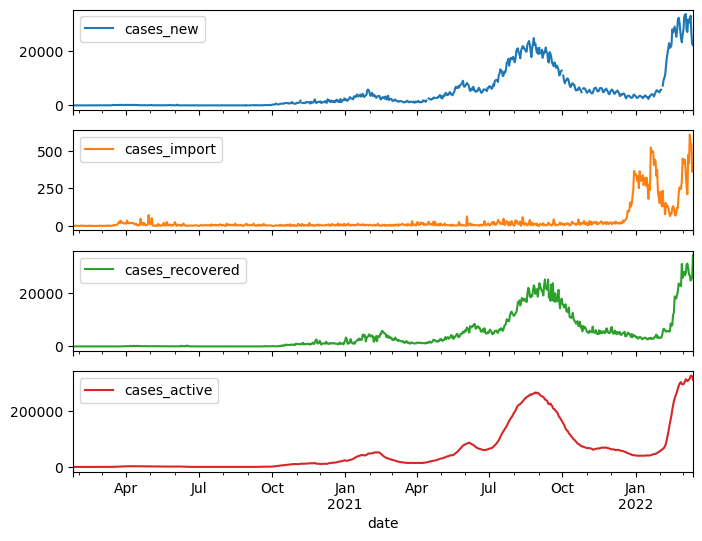

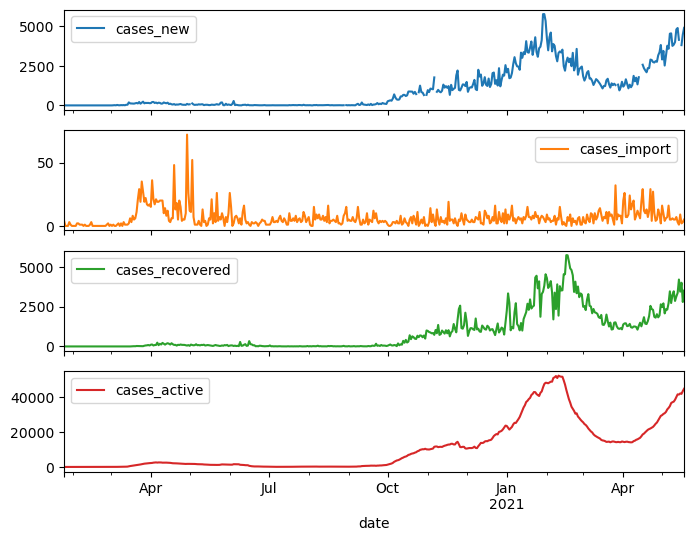

In [9]:
# Data inspection
df.set_index(date_time, inplace=True)
plot_cols = ['cases_new', 'cases_import', 'cases_recovered', 'cases_active']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
 
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [10]:
# Data cleaning
print(df.isnull().sum()) #cases_new have null value

cases_new          13
cases_import        0
cases_recovered     0
cases_active        0
dtype: int64


Data cases images

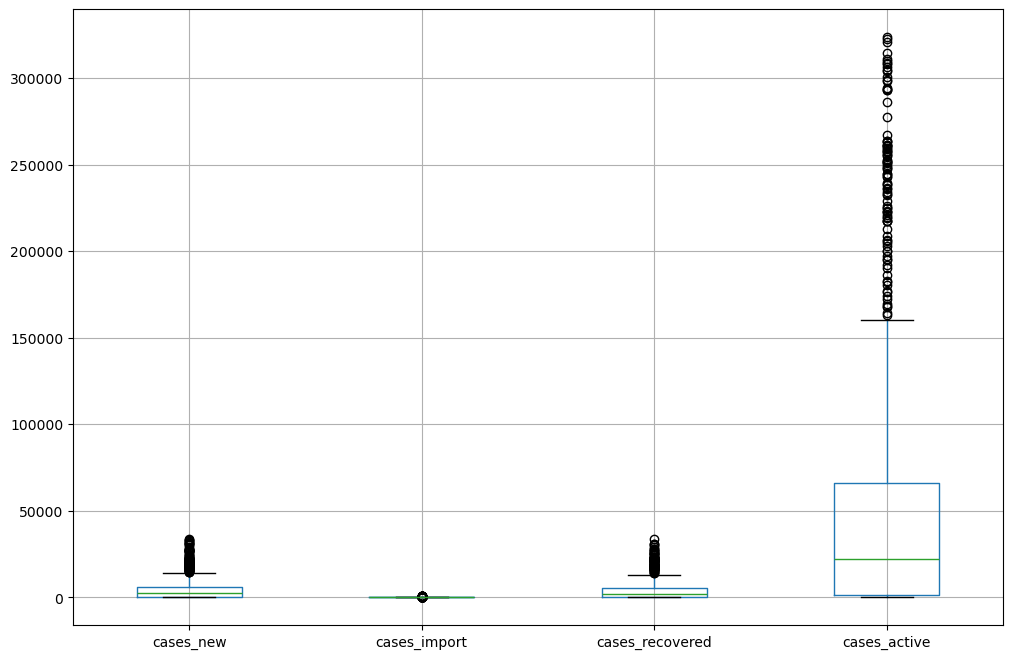

In [11]:
# Box plot
df.boxplot(figsize=(12, 8))
plt.show()

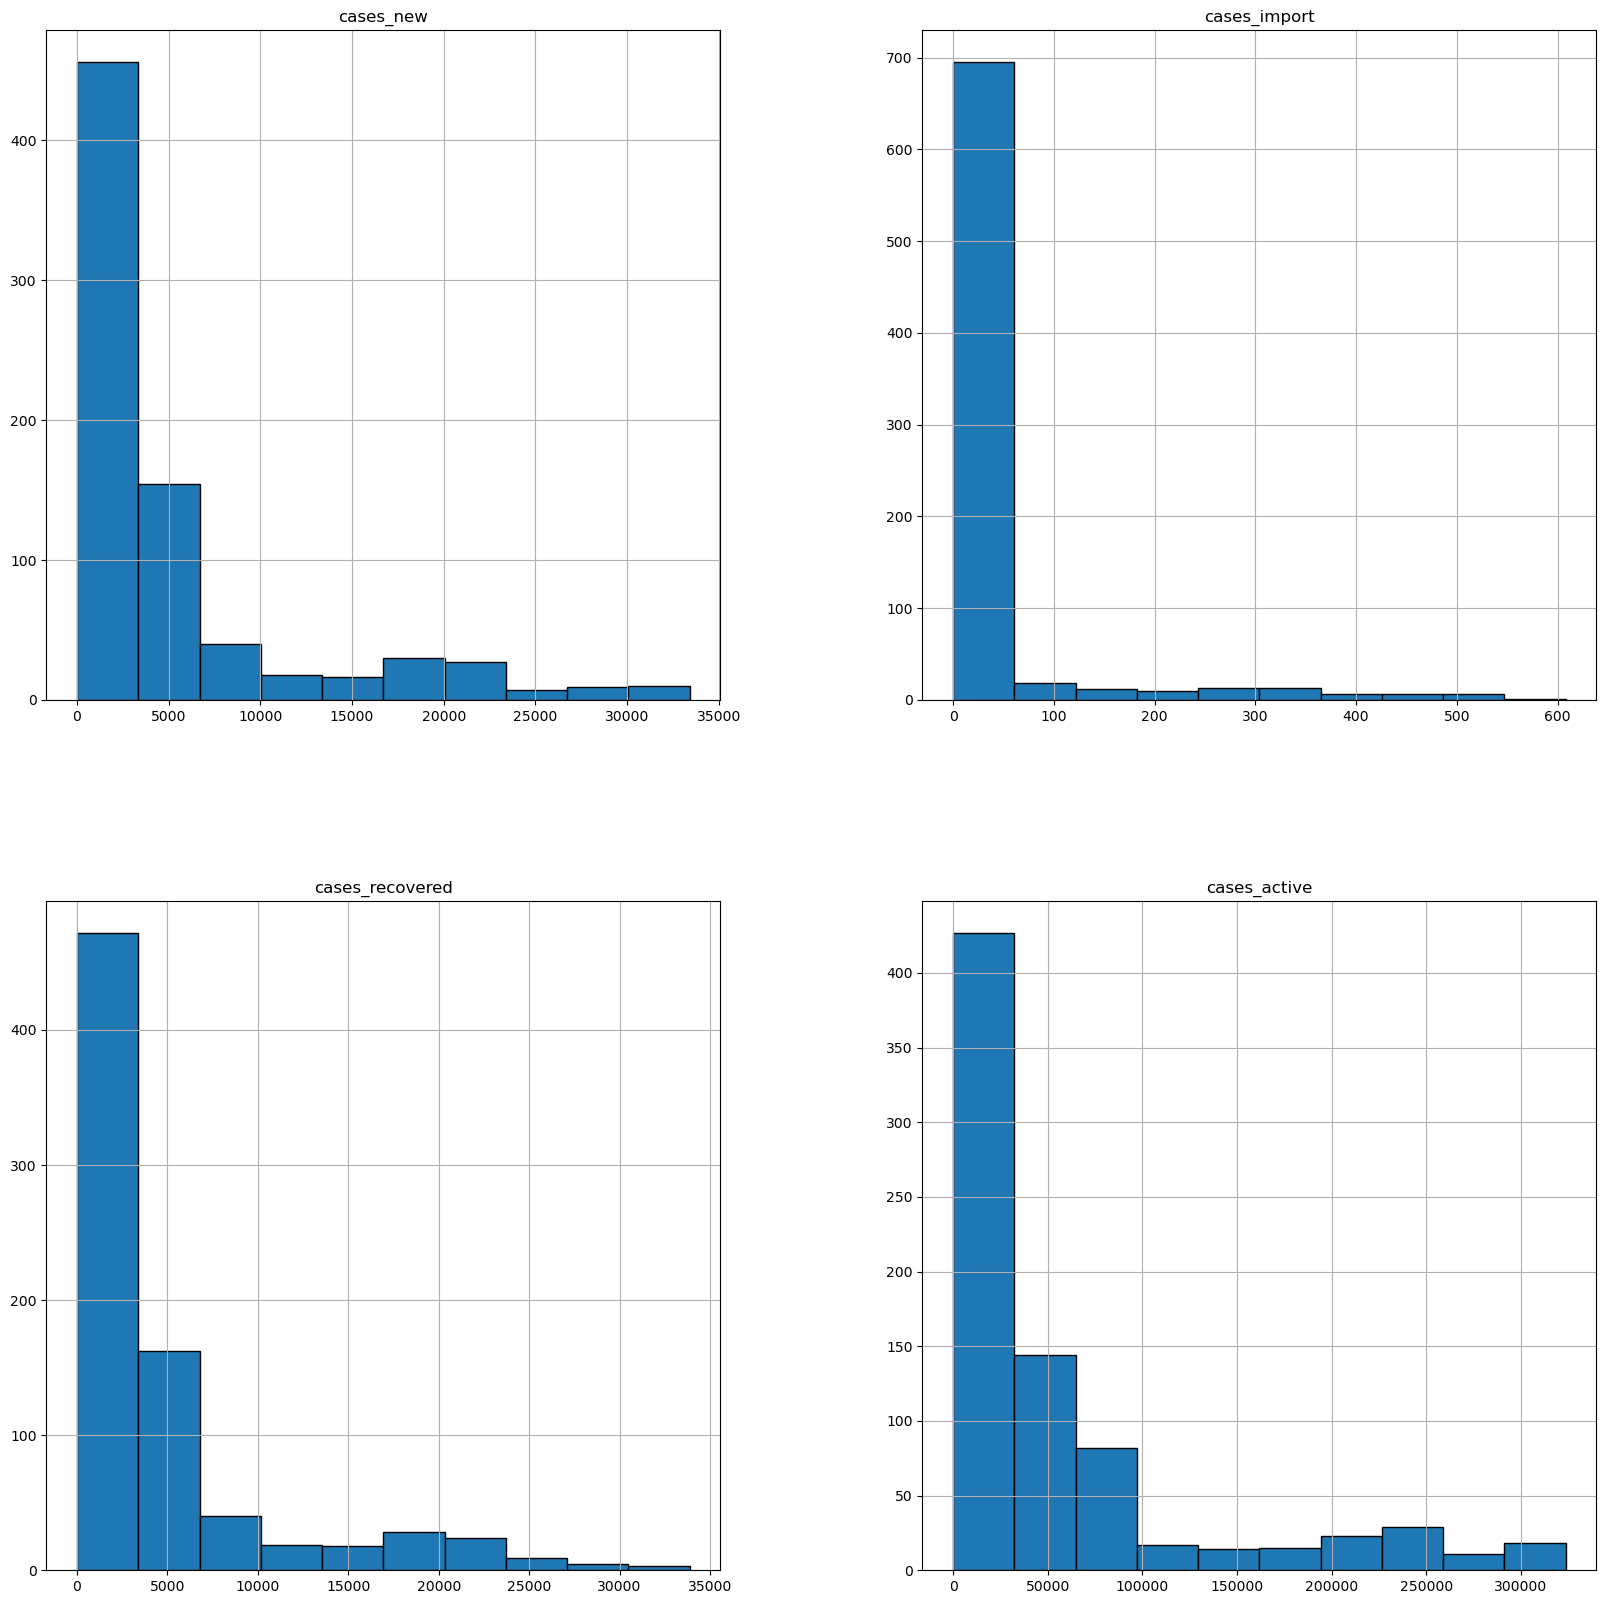

In [12]:
df.hist(figsize=(20,20), edgecolor='black')
plt.show()

In [13]:
df['cases_new'].fillna(df['cases_new'].median(), inplace=True)
print(df.isnull().sum())

cases_new          0
cases_import       0
cases_recovered    0
cases_active       0
dtype: int64


In [14]:
print(df.duplicated().sum())
print(df.shape)

10
(780, 4)


In [15]:
df.drop_duplicates(inplace=True)
# Double check duplicate
print(df.duplicated().sum())
print(df.shape)

0
(770, 4)


In [16]:
# Train, validation, test split for time series data
column_indices = {name: i for i, name in enumerate(df.columns)}
 
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]
 
num_features = df.shape[1]

In [17]:
# Data normalization
train_mean = train_df.mean()
train_std = train_df.std()
 
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


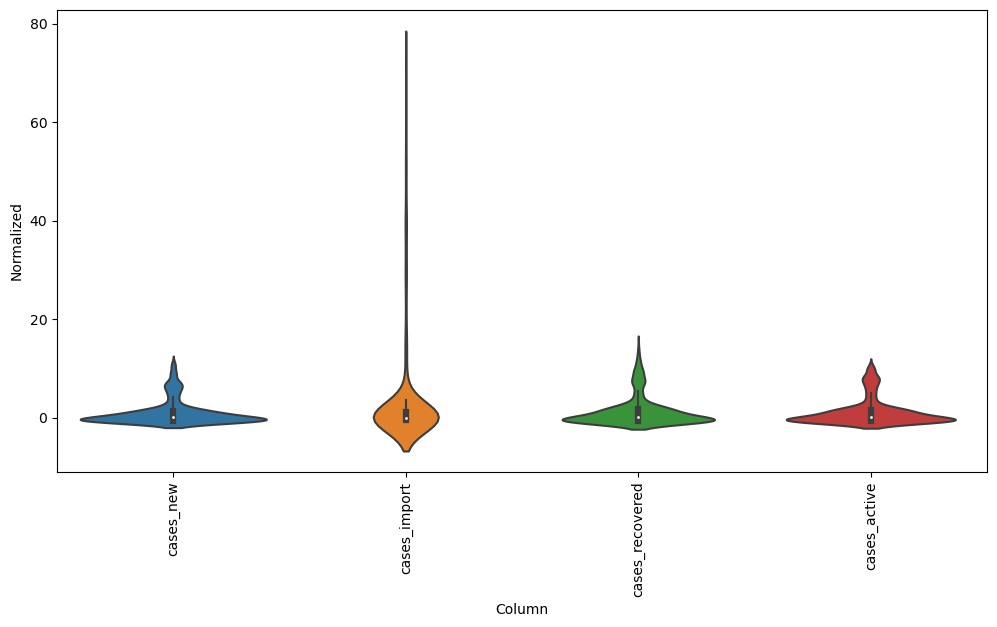

In [18]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)
 
one_predict = WindowGenerator(input_width=25, label_width=25, shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['cases_new'])# %%

In [19]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.LSTM(128, return_sequences=True))
lstm_model.add(keras.layers.Dropout(0.2))
lstm_model.add(keras.layers.Dense(1))

In [20]:
# Function to create sequences for the LSTM models
def create_sequences(data, window_size, output_width, offset):
    X, y = [], []
    for i in range(len(data) - window_size - output_width + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size + offset - 1:i + window_size + output_width + offset - 1, 0])  # Predicting 'cases_new'
    
    # Convert lists of sequences to NumPy arrays
    X = np.array(X)
    
    # Concatenate y sequences into a 2D NumPy array
    y = np.array(y)
    y = np.vstack(y)  # Stack sequences vertically
    
    return X, y

In [21]:
MAX_EPOCHS = 40
 
def compile_and_fit(model, window, patience=3):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
  patience=patience,
  mode='min')
 
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanAbsolutePercentageError()])
 
  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])

In [22]:
# Compile the model and train
history_1 = compile_and_fit(lstm_model, one_predict)

Epoch 1/40
17/17 [==============================] - 5s 33ms/step - loss: 0.2988 - mean_absolute_error: 0.3795 - mean_absolute_percentage_error: 200.9612 - val_loss: 5.2700 - val_mean_absolute_error: 1.7153 - val_mean_absolute_percentage_error: 110.7248
Epoch 2/40
17/17 [==============================] - 0s 11ms/step - loss: 0.1024 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 144.6810 - val_loss: 3.6906 - val_mean_absolute_error: 1.4627 - val_mean_absolute_percentage_error: 116.2374
Epoch 3/40
17/17 [==============================] - 0s 10ms/step - loss: 0.0760 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 119.2434 - val_loss: 2.9867 - val_mean_absolute_error: 1.3010 - val_mean_absolute_percentage_error: 109.6920
Epoch 4/40
17/17 [==============================] - 0s 10ms/step - loss: 0.0644 - mean_absolute_error: 0.1633 - mean_absolute_percentage_error: 108.3904 - val_loss: 3.0302 - val_mean_absolute_error: 1.3218 - val_mean_absolute_percentage_erro

In [29]:
# Evaluate the model
print(lstm_model.evaluate(one_predict.val))
print(lstm_model.evaluate(one_predict.test))

5/5 [==============================] - 0s 6ms/step - loss: 3.1083 - mean_absolute_error: 1.3337 - mean_absolute_percentage_error: 102.5091
[3.1082770824432373, 1.33365797996521, 102.50907897949219]
2/2 [==============================] - 0s 8ms/step - loss: 12.7369 - mean_absolute_error: 2.6074 - mean_absolute_percentage_error: 61.6057
[12.736891746520996, 2.607388496398926, 61.60566711425781]


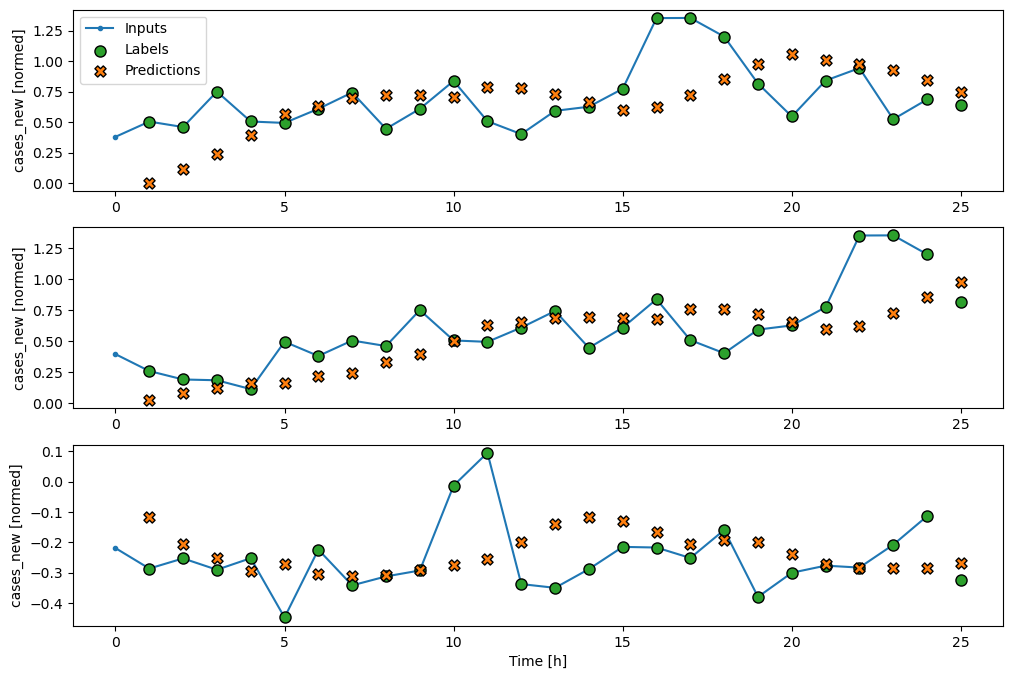

In [30]:
# Plot the resultt
one_predict.plot(model=lstm_model, plot_col='cases_new')

Multistep window

In [31]:
multi_predict = WindowGenerator(input_width=25, label_width=25, shift=25, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['cases_new'])

In [23]:
window_size = 30
output_width = 30
offset_single_step = 1
offset_multi_step = 30

In [32]:
#Build step model
multi_lstm = keras.Sequential()
multi_lstm.add(keras.layers.LSTM(32, return_sequences=False))
multi_lstm.add(keras.layers.Dense(25*1))
multi_lstm.add(keras.layers.Reshape([25,1]))

In [24]:
# Convert the DataFrame to a numpy array
data = df[['cases_new', 'cases_import', 'cases_recovered', 'cases_active']].values

# Create sequences for single step window scenario
X_single, y_single = create_sequences(data, window_size, output_width, offset_single_step)

In [25]:
# Define the LSTM model for single step window scenario
model_single = Sequential()
model_single.add(LSTM(64, input_shape=(window_size, data.shape[1])))
model_single.add(Dropout(0.2))
model_single.add(Dense(output_width))
model_single.compile(loss='mae', optimizer='adam')

In [33]:
# Compile and train model for multi step
history_2 = compile_and_fit(multi_lstm, multi_predict)

Epoch 1/40
16/16 [==============================] - 2s 32ms/step - loss: 0.6297 - mean_absolute_error: 0.5977 - mean_absolute_percentage_error: 122.3084 - val_loss: 7.8959 - val_mean_absolute_error: 2.1111 - val_mean_absolute_percentage_error: 89.1117
Epoch 2/40
16/16 [==============================] - 0s 11ms/step - loss: 0.4606 - mean_absolute_error: 0.4872 - mean_absolute_percentage_error: 153.0493 - val_loss: 6.7592 - val_mean_absolute_error: 1.8301 - val_mean_absolute_percentage_error: 77.7515
Epoch 3/40
16/16 [==============================] - 0s 11ms/step - loss: 0.3275 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 238.5434 - val_loss: 5.6164 - val_mean_absolute_error: 1.5508 - val_mean_absolute_percentage_error: 72.2075
Epoch 4/40
16/16 [==============================] - 0s 11ms/step - loss: 0.2412 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 264.5043 - val_loss: 4.9545 - val_mean_absolute_error: 1.4222 - val_mean_absolute_percentage_error: 

In [34]:
# Evaluate the model
print(multi_lstm.evaluate(multi_predict.val))
print(multi_lstm.evaluate(multi_predict.test))

4/4 [==============================] - 0s 5ms/step - loss: 4.0033 - mean_absolute_error: 1.4534 - mean_absolute_percentage_error: 115.2001
[4.003308296203613, 1.4534425735473633, 115.2000961303711]
1/1 [==============================] - 0s 47ms/step - loss: 46.2570 - mean_absolute_error: 6.1676 - mean_absolute_percentage_error: 95.7453
[46.257049560546875, 6.167571067810059, 95.74526977539062]


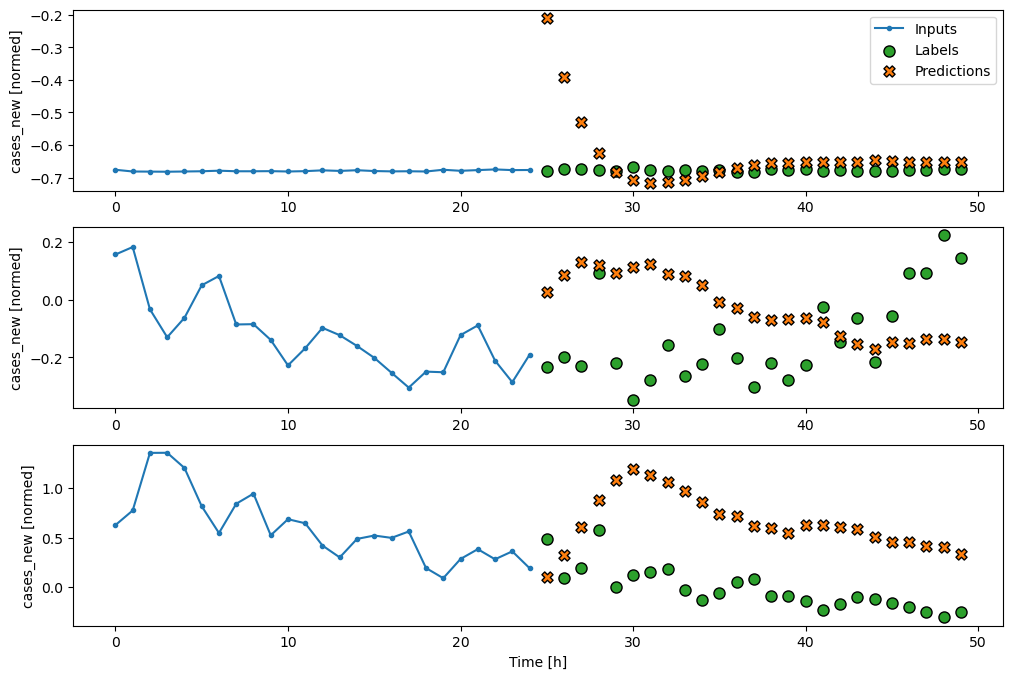

In [35]:
# Plot the resultt
multi_predict.plot(model=lstm_model, plot_col='cases_new')

In [41]:
from datetime import datetime

log_dir_one_predict = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "_one_predict"
log_dir_multi_predict = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "_multi_predict"


In [42]:
# Create WindowGenerators
one_predict = WindowGenerator(input_width=25, label_width=25, shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['cases_new'])
multi_predict = WindowGenerator(input_width=25, label_width=25, shift=25, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['cases_new'])


In [43]:
# Callback for TensorBoard
tensorboard_callback_one_predict = tf.keras.callbacks.TensorBoard(log_dir=log_dir_one_predict, histogram_freq=1)
tensorboard_callback_multi_predict = tf.keras.callbacks.TensorBoard(log_dir=log_dir_multi_predict, histogram_freq=1)


In [44]:
# Compile and fit for one-step prediction
compile_and_fit(lstm_model, one_predict)
# Pass TensorBoard callback in the fit function
history_1 = lstm_model.fit(one_predict.train, epochs=MAX_EPOCHS,
                            validation_data=one_predict.val,
                            callbacks=[tensorboard_callback_one_predict])


Epoch 1/40
17/17 [==============================] - 2s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 107.7972 - val_loss: 2.2578 - val_mean_absolute_error: 1.1229 - val_mean_absolute_percentage_error: 101.1194
Epoch 2/40
17/17 [==============================] - 0s 13ms/step - loss: 0.0421 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 94.5576 - val_loss: 2.1397 - val_mean_absolute_error: 1.0951 - val_mean_absolute_percentage_error: 103.8080
Epoch 3/40
17/17 [==============================] - 0s 11ms/step - loss: 0.0375 - mean_absolute_error: 0.1244 - mean_absolute_percentage_error: 94.7311 - val_loss: 1.9909 - val_mean_absolute_error: 1.0560 - val_mean_absolute_percentage_error: 103.2725
Epoch 4/40
17/17 [==============================] - 0s 12ms/step - loss: 0.0332 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 95.4165 - val_loss: 1.7420 - val_mean_absolute_error: 0.9832 - val_mean_absolute_percentage_error: 

In [45]:
# Compile and fit for multi-step prediction
compile_and_fit(multi_lstm, multi_predict)
# Pass TensorBoard callback in the fit function
history_2 = multi_lstm.fit(multi_predict.train, epochs=MAX_EPOCHS,
                           validation_data=multi_predict.val,
                           callbacks=[tensorboard_callback_multi_predict])

Epoch 1/40
16/16 [==============================] - 2s 31ms/step - loss: 0.0852 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 124.4080 - val_loss: 3.9968 - val_mean_absolute_error: 1.4697 - val_mean_absolute_percentage_error: 118.4505
Epoch 2/40
16/16 [==============================] - 0s 11ms/step - loss: 0.0802 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 113.6809 - val_loss: 4.0416 - val_mean_absolute_error: 1.4747 - val_mean_absolute_percentage_error: 118.3826
Epoch 3/40
16/16 [==============================] - 0s 11ms/step - loss: 0.0711 - mean_absolute_error: 0.1551 - mean_absolute_percentage_error: 106.4762 - val_loss: 4.0245 - val_mean_absolute_error: 1.4732 - val_mean_absolute_percentage_error: 118.5893
Epoch 4/40
16/16 [==============================] - 0s 11ms/step - loss: 0.0656 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 99.9210 - val_loss: 4.0492 - val_mean_absolute_error: 1.4883 - val_mean_absolute_percentage_error